# Word embeddings & analysis of Poetry
* Digital humanities
* Gutenberg corpus includes preamble/non poetry. Could maybe be filtered
* Data may further be cleaned by using lemmatization etc'. +- pretrained w2v models, multilingual. 

In [1]:
from gensim.utils import simple_preprocess
from gensim.sklearn_api.phrases import PhrasesTransformer # phrases/ coallocations - https://radimrehurek.com/gensim/sklearn_api/phrases.html
from gensim.sklearn_api import phrases
from gensim.models.phrases import Phrases #, ENGLISH_CONNECTOR_WORDS
from gensim.models import Word2Vec

# import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
interesting_words_list = ["salt","pepper","spice","spices","sweet","spicy","salty","moist",
                          "herbs","herbal","paprika","saffron","mace","lavender","honey","honeysuckle","chile","marjoram","sugar","tea","mint",
                          "taste","smell","aroma",
                          "cinnamon","cardamom","peppercorn","turmeric","anise","zaatar",
                          "fork","knife",
                         "basil","cilantro","chili","cumin","onion","garlic","dill","horseradish","radish","mustard","peppermint","pepper","sage","vanilla","wasabi"]

In [3]:
df = pd.read_csv("../input/gutenberg-poetry-dataset/Gutenberg-Poetry.csv",
#                  nrows=1234,
                 usecols=["s"]).drop_duplicates().rename(columns={"s":"text"})
# ,nrows=123456
df = df.loc[df["text"].str.split().str.len()>1]
df

,text
0,The Song of Hiawatha is based on the legends a...
1,"many North American Indian tribes, but especia..."
2,"Ojibway Indians of northern Michigan, Wisconsi..."
3,"They were collected by Henry Rowe Schoolcraft,..."
4,"Schoolcraft married Jane, O-bah-bahm-wawa-ge-z..."
...,...
3085095,Half-open on his father's smile.
3085100,"And his face the index be,"
3085101,Of his mother's chastity.'--Martin.
3085102,'Neque Alexandrina beluata conchyliata tapetia.'


In [4]:
## https://stackoverflow.com/questions/51049568/attributeerror-on-spacy-token-pos
## we could also lemmatize
# from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

df["text"] = df["text"].apply(lambda x: simple_preprocess(x, deacc=True, max_len=50,min_len=2))
# df.drop_duplicates("text",inplace=True)
print(df.shape)
# ## drop duplicates - on list
# df = df[~df["text"].apply(pd.Series).duplicated()]
# print(df.shape)

## phrases coallocation
m = PhrasesTransformer(min_count=6,max_vocab_size=30000000)
# df["text"] = m.fit_transform(df["text"].values)
m.fit(df["text"])

# df["text"] = df["text"].apply(m.transform)
df["text"]  = m.transform(df["text"])


sentences = df["text"]

(2697916, 1)


In [5]:
df["text"].str.len().describe()

count    2.697916e+06
mean     6.890627e+00
std      2.011051e+00
min      0.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.700000e+01
Name: text, dtype: float64

In [6]:
#an example sentence in the data
print(sentences.iloc[7])

['who', 'was', 'chief', 'of', 'the', 'ojibway', 'tribe', 'at', 'la', 'pointe', 'wisconsin']


In [7]:
#Word2Vec
#training the gensim on the data
#Using the Cbow architecture for the word2Vec

model_cbow = Word2Vec(sentences, min_count = 2, size = 200, workers = 3, window = 7)

In [8]:
#Any example word vector
print('chief\n:',model_cbow['chief']) 

chief
: [-3.29579264e-01  2.37399787e-02 -1.88135087e+00  4.67423677e-01
 -4.37874794e-01 -6.50076509e-01 -1.21222603e+00  1.26952624e+00
  2.96298593e-01  3.38204592e-01  3.99387836e-01  1.26385534e+00
  1.01540482e+00 -3.90980542e-01  1.35969114e+00 -1.05056620e+00
  8.11243951e-01 -7.15831578e-01  9.78798091e-01 -1.87747884e+00
 -5.68539679e-01 -8.40581179e-01  1.52938509e+00 -5.22990406e-01
  2.02985898e-01 -5.52233338e-01 -6.54103220e-01 -5.94967842e-01
  1.56531990e+00  5.55585146e-01  1.38017881e+00 -3.38690907e-01
  7.31832325e-01 -1.18300211e+00  1.31044865e+00  5.13022721e-01
  7.46487617e-01 -2.69166976e-01  5.96500747e-02  2.24437267e-01
  7.22388744e-01  1.22897816e+00 -5.48643649e-01  7.64915407e-01
  7.24729836e-01  1.18045795e+00  4.81219739e-02 -1.73033625e-01
  4.82107699e-01 -1.92569047e-01  1.32766187e+00 -4.85817611e-01
 -5.69949448e-01 -2.83498734e-01  3.16106558e-01  5.04456699e-01
 -1.12916994e+00 -4.33658987e-01  1.04101598e+00  1.45408165e+00
  1.15278728e-01 

In [9]:
# Similarity of the words
print(model_cbow.similarity('chief', 'indian'))

0.17321768


#### Most similar words to a word
* CBOW model

In [10]:
print('the 10 most similar words to indian:\n')
model_cbow.most_similar('indian')

the 10 most similar words to indian:



[('sicilian', 0.6110431551933289),
 ('african', 0.6066490411758423),
 ('arcadian', 0.6064518690109253),
 ('arabian', 0.5903801918029785),
 ('eastern', 0.5815781354904175),
 ('elfin', 0.5793461203575134),
 ('irish', 0.578553318977356),
 ('ethiop', 0.5762097835540771),
 ('elder', 0.5724563598632812),
 ('italian', 0.5622481107711792)]

In [11]:
for w in interesting_words_list:
    try: print(w,"\n",[i[0] for i in model_cbow.most_similar(w, topn=13)])
    except: pass

salt 
 ['froth', 'milk', 'spice', 'brackish', 'lees', 'dry', 'barley', 'sugar', 'salt_sea', 'foaming', 'gall', 'oil', 'honey']
pepper 
 ['porridge', 'biscuit', 'chocolate', 'champagne', 'pickled', 'venison', 'currant', 'broth', 'flour', 'pork', 'ginger', 'potatoes', 'candy']
spice 
 ['spices', 'musk', 'luscious', 'myrrh', 'spicy', 'nard', 'curds', 'honey', 'cream', 'cassia', 'cinnamon', 'juice', 'thyme']
spices 
 ['spice', 'perfumes', 'nard', 'odors', 'frankincense', 'odours', 'myrrh', 'wines', 'juices', 'unguents', 'luscious', 'spicy', 'fruitage']
sweet 
 ['sweetest', 'soft', 'fragrant', 'sweetly', 'lovely', 'delicious', 'tender', 'beautiful', 'bland', 'balmy', 'dear', 'charming', 'soothing']
spicy 
 ['aromatic', 'cassia', 'odorous', 'scented', 'fragrant', 'citron', 'spice', 'luscious', 'ambrosial', 'musk', 'scents', 'perfumed', 'luxuriant']
salty 
 ['miasma', 'exhalation', 'acrid', 'gaseous', 'tansies', 'ambergris', 'scalding', 'prinking', 'choorch', 'cowd', 'andais', 'syrups', 'abys

In [12]:
# defining a tsne function to visualize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def plot_tsne(model, num):
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    tsne = TSNE(perplexity = 40, n_components = 2, init = 'pca', n_iter = 2500, random_state = 23)
    data = tsne.fit_transform(tokens[:num])
    x = []
    y = []
    for each in data:
        x.append(each[0])
        y.append(each[1])
    plt.figure(figsize = (13, 13))
    for i in range(num):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy = (x[i], y[i]),
                     xytext = (5,2),
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
    plt.show()

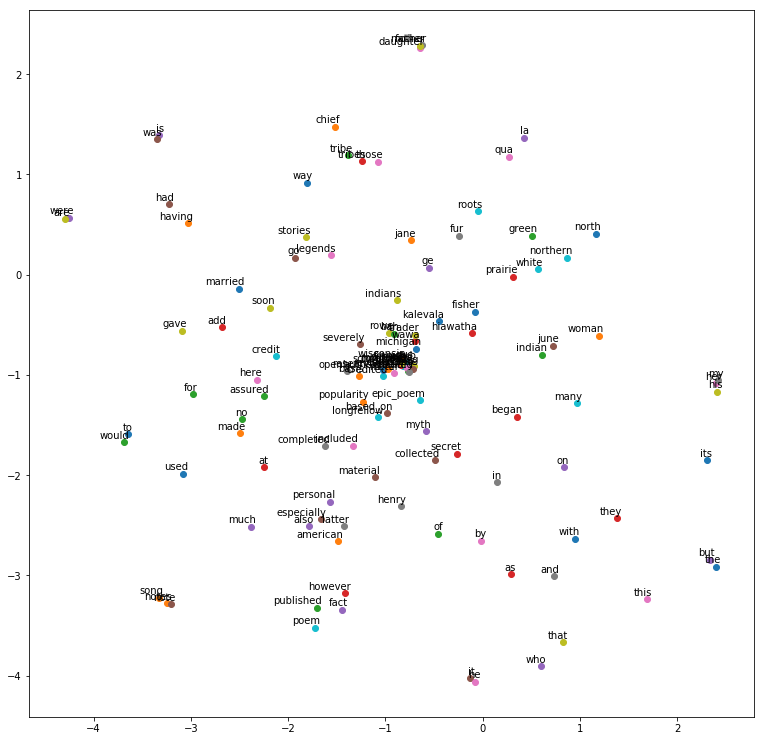

In [13]:
#visualising the cbow architecture(only the first 120)
plot_tsne(model_cbow, 120)

In [14]:
#let's see how the skipgram model works on the data
model_skipgram = Word2Vec(sentences, min_count = 1, size = 150, workers = 3, window = 7, sg = 1)

In [15]:
#Computing the similarities of the words
print(model_skipgram.similarity('indian', 'chief'))

0.5087471


#### skipgram - most similar words

In [16]:
for w in interesting_words_list:
    try: print(w,"\n",[i[0] for i in model_skipgram.most_similar(w, topn=13)])
    except: pass

salt 
 ['brackish', 'yeast', 'scurf', 'froth', 'salty', 'frothing', 'curds', 'sponge', 'dry', 'lard', 'salt_water', 'whey', 'crusts']
pepper 
 ['veal', 'lemonade', 'biscuit', 'chocolate', 'soda', 'pounded', 'lard', 'biscuits', 'stuffing', 'molasses', 'porridge', 'melon', 'pork']
spice 
 ['spices', 'spicy', 'cinnamon', 'rice', 'musk', 'honeycomb', 'garlic', 'thyme', 'aromatic', 'lemon', 'curds', 'nutmeg', 'cassia']
spices 
 ['spice', 'honeycomb', 'nard', 'perfumes', 'spicy', 'curds', 'ambergris', 'frankincense', 'cinnamon', 'spikenard', 'odors', 'sandal_wood', 'odoriferous']
sweet 
 ['mellifluous', 'delicious', 'ravishing', 'soft', 'enamored', 'maidenhood', 'lullabies', 'sweeter_than', 'sunny_smile', 'lovely', 'tenderer', 'refreshing', 'quietness']
spicy 
 ['aromatic', 'citron', 'attar', 'cassia', 'musky', 'spice', 'spices', 'sabaean', 'odoriferous', 'nectared', 'fragrant', 'freshened', 'scented']
salty 
 ['acrid', 'oozing', 'drippin', 'droppings', 'seeps', 'scalding', 'parched_lips', '

In [17]:
print('the 10 most similar words to indian:\n')
model_skipgram.most_similar('indian')

the 10 most similar words to indian:



[('arabian', 0.7565000653266907),
 ('african', 0.7140570878982544),
 ('phoenician', 0.7133909463882446),
 ('australian', 0.7111815810203552),
 ('ethiop', 0.7071890830993652),
 ('syrian', 0.6974096894264221),
 ('georgian', 0.6961514353752136),
 ('asian', 0.6944894194602966),
 ('persian', 0.6938092112541199),
 ('sicilian', 0.6901929378509521)]

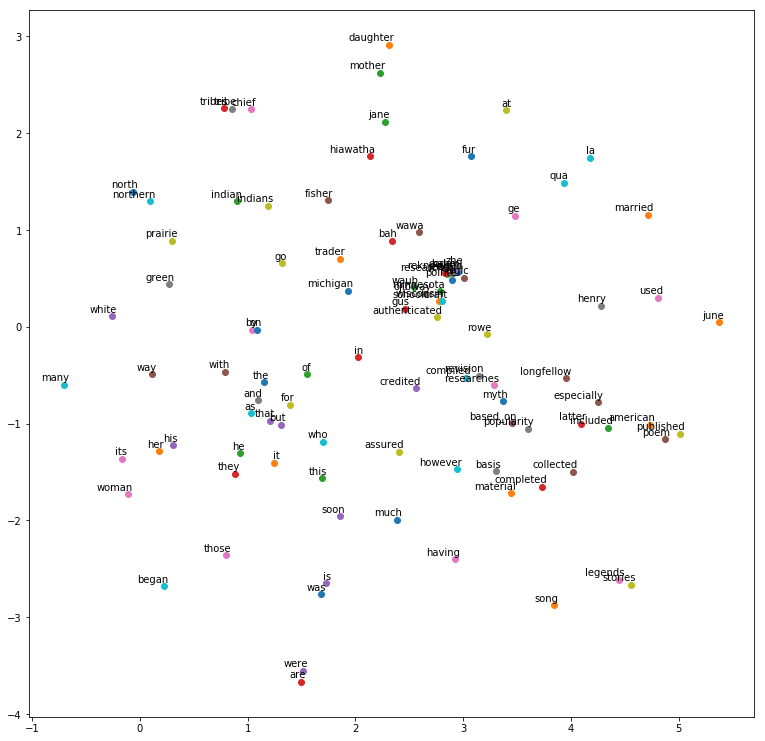

In [18]:
#visualising the skipgram archtecture(only the first 100)
plot_tsne(model_skipgram,100)

### glove based model/embeddings

In [19]:
#using the glove package for embeddings
!pip install glove_python

     |████████████████████████████████| 266kB 567kB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=745392 sha256=80db470845b3a802e9e9da7c12910302983d7c22b4170c21592bf0cc9cac6e45
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [20]:
from glove import Corpus, Glove
corpus = Corpus()
corpus.fit(sentences, window = 6)
glove = Glove(no_components = 150, learning_rate = 0.06)
glove.fit(corpus.matrix, epochs = 30, no_threads = 4, verbose = False)
glove.add_dictionary(corpus.dictionary)

In [21]:
#Computing the similarities of the words
print(glove.most_similar('indian', number = 9))

[('italian', 0.7069006196842824), ('elfin', 0.68039751967997), ('persian', 0.6730287185793173), ('flee_owre', 0.6669825322414703), ('roman', 0.665499116577113), ('elf', 0.6654740456086076), ('isle', 0.6651479952554177), ('eastern', 0.6632236674858754)]


In [22]:
for w in interesting_words_list:
    try: print(w,"\n",[i[0] for i in glove.most_similar(w, number=13)])
    except: pass

salt 
 ['driddlety', 'shells', 'wave', 'brine', 'foaming', 'sand', 'spray', 'titwillow', 'sailful', 'scent', 'mischt', 'waves']
pepper 
 ['rice', 'mint', 'furze', 'sash', 'pails', 'balmy_air', 'stews', 'domed', 'biscuit', 'tape', 'scurf', 'conceits']
spice 
 ['amethyst', 'spices', 'oil', 'musk', 'grime', 'poisonous', 'lime', 'myrtle', 'placentas', 'odor', 'thyme', 'soap']
spices 
 ['spice', 'musk', 'odours', 'forks', 'bales', 'stench', 'placentas', 'gaiety', 'jessamine', 'luscious', 'potion', 'verdure']
sweet 
 ['unpityingly', 'perfume', 'isouds', 'smilia', 'music', 'melody', 'smell', 'runeful', 'kisses', 'honey', 'ultraje', 'vishnia']
spicy 
 ['noisome', 'perfumed', 'odorous', 'frothy', 'reedy', 'muddy', 'aromatic', 'dulcet', 'citron', 'cooling', 'insidious', 'honied']
salty 
 ['golden_ore', 'adherent', 'flowing_streams', 'bunting', 'harley', 'manacles', 'ravin', 'fetching', 'saras', 'unremitting', 'sav_ry', 'sacredness']
moist 
 ['damp', 'wet', 'insidiousness', 'stho', 'entrails', 'i

In [23]:
# now visualising first 80 words using tsne
def plot_tsne_glove(model, num):
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(glove.word_vectors[glove.dictionary[word]])
        labels.append(word)
    tsne = TSNE(perplexity = 40, n_components = 2, init = 'pca', n_iter = 2500, random_state = 23)
    data = tsne.fit_transform(tokens[:num])
    x = []
    y = []
    for each in data:
        x.append(each[0])
        y.append(each[1])
    plt.figure(figsize = (12, 12))
    for i in range(num):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy = (x[i], y[i]),
                     xytext = (5,2),
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
    plt.title('Word vectorization using Glove')
    plt.show()

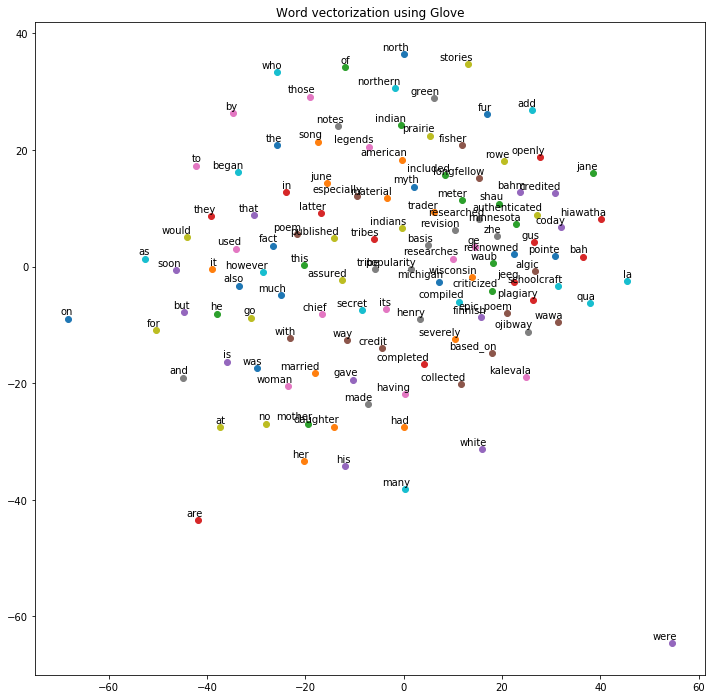

In [24]:
plot_tsne_glove(model_skipgram, 120)